In [23]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [24]:
load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [25]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [26]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fbe598eefd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbe59a6d090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe59a4f0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe59a6db50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbe59a3d5d0>,
  <matplotlib.lines.Line2D at 0x7fbe59a3db10>]}

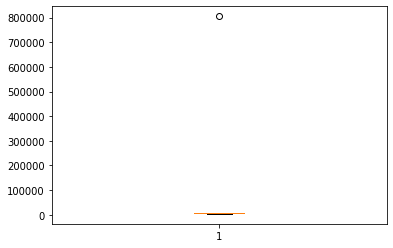

In [27]:
plt.boxplot(load_data.iloc[:,0])

In [28]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [29]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fbe5983c290>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbe598412d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe59848310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe59841d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbe5983c810>,
  <matplotlib.lines.Line2D at 0x7fbe5983cd50>]}

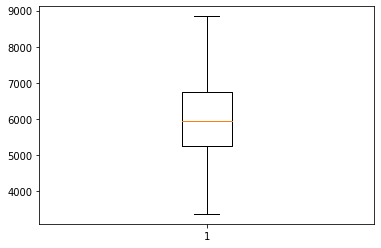

In [30]:
plt.boxplot(load_data.iloc[:,0])

In [31]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

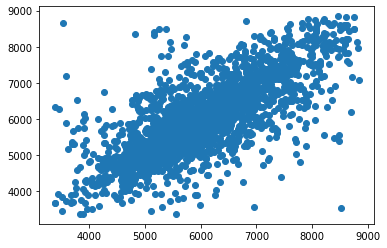

In [32]:
plt.scatter(x,y)

In [33]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)

In [34]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [35]:
x = minmax_scale(x)
y = minmax_scale(y)

In [36]:
data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [37]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c,v_m,v_c,momentum_coeff)
    deltac = -1*learning_rate*gradc(d,m,c,v_m,v_c,momentum_coeff)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.5008056228356933
epoch 0, batch 1, error 0.47678849872333606
epoch 0, batch 2, error 0.44271155256922784
epoch 0, batch 3, error 0.4079016753313568
epoch 1, batch 0, error 0.3677892365917361
epoch 1, batch 1, error 0.32757949458309343
epoch 1, batch 2, error 0.2802207928353382
epoch 1, batch 3, error 0.23364358404249003
epoch 2, batch 0, error 0.19978827842163704
epoch 2, batch 1, error 0.16359648775597915
epoch 2, batch 2, error 0.12987641174248443
epoch 2, batch 3, error 0.10024252535741346
epoch 3, batch 0, error 0.07808410534195728
epoch 3, batch 1, error 0.06220206147757663
epoch 3, batch 2, error 0.04158161230902219
epoch 3, batch 3, error 0.027507536472032624
epoch 4, batch 0, error 0.020912562281729618
epoch 4, batch 1, error 0.014941615759705427
epoch 4, batch 2, error 0.011778136604340595
epoch 4, batch 3, error 0.008808705878107377
epoch 5, batch 0, error 0.009686415196715079
epoch 5, batch 1, error 0.008713523225780522
epoch 5, batch 2, error 0.010

Text(0.5, 1.0, 'error graph')

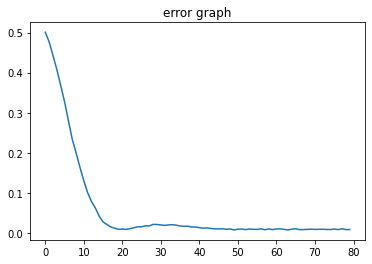

In [38]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [39]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.008888507383876006
test error : 0.008514986214275908


In [40]:
print(m,c)

0.6281113015928705 0.18491459035624558


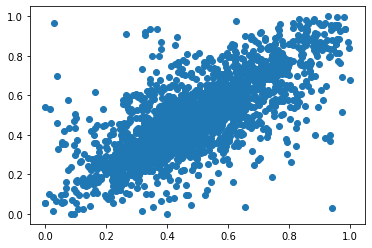

In [41]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

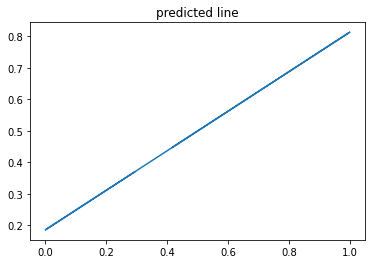

In [42]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

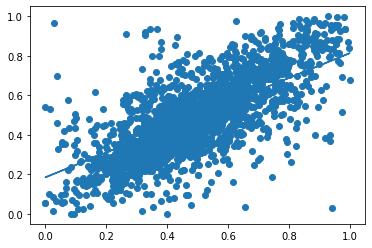

In [43]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [44]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4539
predicted load for this hour is :  5117.534392167157
